In [1]:
from google.colab import files
file = files.upload()

Saving train_data.csv to train_data (1).csv


In [2]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization, Activation
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import os
import numpy as np
import pandas as pd

train_data = pd.read_csv("train_data.csv")
train_data = train_data.iloc[:, 1:]

train_data.head()

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,Action,time,Event
0,0.62,0.03,0.10,0.28,0.43,0.67,0.38,0.12,0.15,0.88,0.72,0.89,0.43,0.36,0.43,0.66,0.16,0,0.47,1
1,0.12,0.87,0.43,0.28,0.02,0.23,0.82,0.14,0.81,0.68,0.53,0.24,0.05,0.01,0.96,0.98,0.34,0,1.39,1
2,0.37,0.06,0.47,0.86,0.86,0.33,0.01,0.90,0.79,0.43,0.64,0.84,0.05,0.56,0.01,0.77,0.62,0,3.61,1
3,0.57,0.39,0.65,0.76,0.83,0.92,0.57,0.60,0.34,0.35,0.44,0.93,0.44,0.65,0.61,0.25,0.96,0,1.02,1
4,0.82,0.00,0.26,0.27,0.82,0.68,0.43,0.92,0.81,0.26,0.66,0.04,0.10,0.93,0.82,0.37,0.09,1,2.07,1


In [3]:
train_data = train_data.drop(np.where(train_data.time == 0)[0].tolist())
train_data

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,Action,time,Event
0,0.62,0.03,0.10,0.28,0.43,0.67,0.38,0.12,0.15,0.88,0.72,0.89,0.43,0.36,0.43,0.66,0.16,0,0.47,1
1,0.12,0.87,0.43,0.28,0.02,0.23,0.82,0.14,0.81,0.68,0.53,0.24,0.05,0.01,0.96,0.98,0.34,0,1.39,1
2,0.37,0.06,0.47,0.86,0.86,0.33,0.01,0.90,0.79,0.43,0.64,0.84,0.05,0.56,0.01,0.77,0.62,0,3.61,1
3,0.57,0.39,0.65,0.76,0.83,0.92,0.57,0.60,0.34,0.35,0.44,0.93,0.44,0.65,0.61,0.25,0.96,0,1.02,1
4,0.82,0.00,0.26,0.27,0.82,0.68,0.43,0.92,0.81,0.26,0.66,0.04,0.10,0.93,0.82,0.37,0.09,1,2.07,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
661,0.50,0.99,0.61,0.88,0.68,0.34,0.96,1.00,0.19,0.80,0.14,0.29,0.41,0.40,0.73,0.76,0.01,1,4.77,1
662,0.62,0.19,0.51,0.30,0.12,0.10,0.41,0.25,0.17,0.17,0.73,0.20,0.18,0.10,0.19,0.39,0.17,1,0.03,1
663,0.84,0.30,0.99,0.55,0.83,0.98,0.17,0.33,0.83,0.45,0.68,0.51,0.57,0.46,0.71,0.29,0.37,0,3.60,1
664,0.94,0.83,0.37,0.69,0.92,0.62,0.39,0.41,0.20,0.74,0.60,0.46,0.21,0.06,0.23,0.93,0.26,0,6.52,1


In [39]:
# X = train_data.iloc[:, [4, 6, 10, 13, 14, 17]]
X = train_data.iloc[:, :18]
y = train_data.iloc[:, 18]

X_train, X_val, y_train, y_val = train_test_split(X, np.log(y) + 5, test_size=0.2)

X_train.shape

(525, 18)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


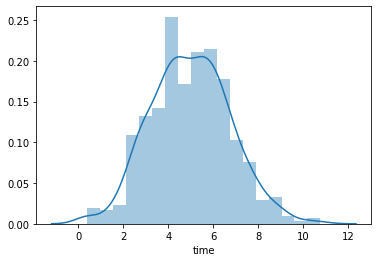

In [41]:
import seaborn as sns

sns.distplot(y_train)

In [42]:
input_size = X_train.shape[1]
hidden_size = [20, 50, 100, 150, ]
code_size = 32

model = Sequential()

model.add(Dense(input_size, activation='relu', input_shape=(input_size, )))

for node in hidden_size:
    model.add(Dense(node, activation='relu'))

for node in reversed(hidden_size):
    model.add(Dense(node, activation='relu'))

model.add(Dense(input_size, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='linear'))

model.compile(optimizer='adam', loss='mae', metrics=['mse'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 18)                342       
_________________________________________________________________
dense_23 (Dense)             (None, 20)                380       
_________________________________________________________________
dense_24 (Dense)             (None, 50)                1050      
_________________________________________________________________
dense_25 (Dense)             (None, 100)               5100      
_________________________________________________________________
dense_26 (Dense)             (None, 150)               15150     
_________________________________________________________________
dense_27 (Dense)             (None, 150)               22650     
_________________________________________________________________
dense_28 (Dense)             (None, 100)              

In [43]:
checkpoint_path = "training_1/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

cp = ModelCheckpoint(filepath=checkpoint_path,
                    save_weights_only=True,
                    save_best_only=True,
                    verbose=0)

es = EarlyStopping(monitor='val_loss', mode='min', verbose=0, patience=200)

history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10000, verbose=0, callbacks=[cp, es])  # starts training

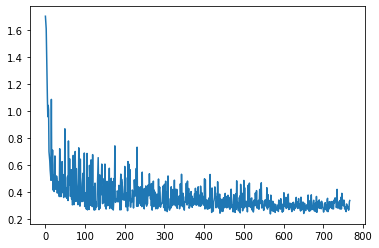

In [44]:
import matplotlib.pyplot as plt

plt.plot(history.history['val_loss'])

In [45]:
model.load_weights(checkpoint_path)

In [46]:
# from google.colab import files
# file = files.upload()

test_data = pd.read_csv("test_data (1).csv")
test_data = test_data.iloc[:, 1:]
test_data

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16
0,0.00,0.10,0.40,0.03,0.46,0.31,0.50,0.15,0.55,0.06,0.68,0.51,0.82,0.57,0.28,0.77,0.74
1,0.52,0.75,0.56,0.78,0.28,0.05,0.52,0.45,0.26,0.05,0.43,0.21,0.88,0.97,0.18,0.05,0.97
2,0.45,0.78,0.47,0.46,0.80,0.51,0.23,0.28,0.88,0.58,0.47,0.41,0.87,0.79,0.73,0.55,0.08
3,0.58,0.29,0.68,0.97,0.20,0.43,0.60,0.68,0.37,0.63,0.83,0.67,0.83,0.18,0.49,0.75,0.54
4,0.38,0.02,0.58,0.51,0.58,0.15,0.45,0.27,0.56,0.09,0.98,0.50,0.39,0.88,0.81,0.18,0.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281,0.31,0.55,0.91,0.37,0.24,0.57,0.33,0.81,0.30,0.09,0.22,0.54,0.88,0.49,0.10,0.53,0.47
282,0.39,0.52,0.19,0.36,0.50,0.08,0.08,0.50,0.42,0.52,0.86,0.13,0.80,0.85,0.98,0.27,0.95
283,0.98,0.87,0.45,0.99,0.94,0.81,0.31,0.00,0.94,0.73,0.70,0.91,0.45,0.34,0.86,0.84,0.58
284,0.43,0.69,0.04,0.59,0.44,0.57,0.66,0.13,0.17,0.40,0.91,0.25,0.25,0.22,0.42,0.79,0.61


In [47]:
test_data_0 = test_data.copy()
test_data_1 = test_data.copy()

test_data_0['Action'] = 0
test_data_1['Action'] = 1

# test_data_0 = test_data_0.iloc[:, [0, 2, 3, 4, 6, 7, 9, 10, 13, 14, 15, 17]]
# test_data_1 = test_data_1.iloc[:, [0, 2, 3, 4, 6, 7, 9, 10, 13, 14, 15, 17]]

# test_data_0 = test_data_0.iloc[:, [4, 6, 10, 13, 14, 17]]
# test_data_1 = test_data_1.iloc[:, [4, 6, 10, 13, 14, 17]]

test_data = pd.concat([test_data_0, test_data_1], axis=0)
test_data = test_data.reset_index(drop=True)
test_data

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,Action
0,0.00,0.10,0.40,0.03,0.46,0.31,0.50,0.15,0.55,0.06,0.68,0.51,0.82,0.57,0.28,0.77,0.74,0
1,0.52,0.75,0.56,0.78,0.28,0.05,0.52,0.45,0.26,0.05,0.43,0.21,0.88,0.97,0.18,0.05,0.97,0
2,0.45,0.78,0.47,0.46,0.80,0.51,0.23,0.28,0.88,0.58,0.47,0.41,0.87,0.79,0.73,0.55,0.08,0
3,0.58,0.29,0.68,0.97,0.20,0.43,0.60,0.68,0.37,0.63,0.83,0.67,0.83,0.18,0.49,0.75,0.54,0
4,0.38,0.02,0.58,0.51,0.58,0.15,0.45,0.27,0.56,0.09,0.98,0.50,0.39,0.88,0.81,0.18,0.17,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
567,0.31,0.55,0.91,0.37,0.24,0.57,0.33,0.81,0.30,0.09,0.22,0.54,0.88,0.49,0.10,0.53,0.47,1
568,0.39,0.52,0.19,0.36,0.50,0.08,0.08,0.50,0.42,0.52,0.86,0.13,0.80,0.85,0.98,0.27,0.95,1
569,0.98,0.87,0.45,0.99,0.94,0.81,0.31,0.00,0.94,0.73,0.70,0.91,0.45,0.34,0.86,0.84,0.58,1
570,0.43,0.69,0.04,0.59,0.44,0.57,0.66,0.13,0.17,0.40,0.91,0.25,0.25,0.22,0.42,0.79,0.61,1


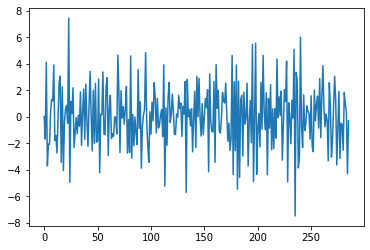

In [58]:
temp = []

for idx in range(len(pred)):
    if idx > num_data:
        break
    else:
        temp.append(pred[idx] - pred[idx + num_data])

plt.plot(temp)

In [71]:
pred = model.predict(test_data)

results = []
num_data = int(len(test_data) / 2) - 1
print(num_data)

for idx in range(len(pred)):
    if idx > num_data:
        break
    else:
        # if pred[idx] > pred[idx + num_data]:
        # 치료의 기준을 더 엄격하게...?
        if pred[idx + num_data] - pred[idx] >= 3:
            results.append(1)
        else:
            results.append(0)

result = pd.DataFrame(zip(list(range(287)), results), columns=['Title', 'action'])
# result.to_csv('./result/lgb_result_change_thres.csv', index=False)
result

285


,Title,action
0,0,0
1,1,0
2,2,0
3,3,1
4,4,0
...,...,...
281,281,0
282,282,0
283,283,0
284,284,1


In [68]:
result.to_csv('auto-encoder_regression_thresholded.csv', index=False)
files.download('auto-encoder_regression_thresholded.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

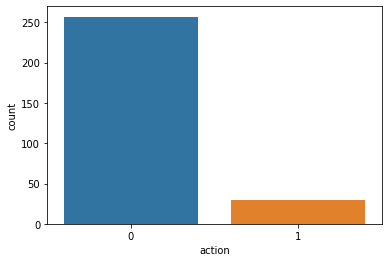

In [73]:
sns.countplot(result.action)

In [72]:
np.sum(result.action == 1)

29